<a href="https://colab.research.google.com/github/yyamira/DSheartfailure/blob/main/Project_Heart_Failure_Clinical_Records.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2-1 Dataset Description and Exploration**





## **2-1.1 Data Description**
###**Task**
The task is to classify the survival of patients with heart failure

###**Classes**
The dataset includes two classes (death event) (boolean):
*   Survive
*   Die


###**Attributes:**
The dataset includes thriteen attributes (clinical features):
*  Age (years)
*  Anaemia (boolean)
*  Creatinine phosphokinase(CPK) (mcg/L)
*  Diabetes (boolean)
*  Ejection fraction (percentage)
*  High blood pressure (boolean)
*  Platelets (kiloplatelets/mL)
*  Sex (binary)
*  Serum creatinine (mg/dL)
*  Serum sodium (mEq/L)
*  Smoking (boolean)
*  Time (days)
*  Death event (target) (boolean)


###**Year:**
The dataset was obtained from medical records of 299 heart failure patients collected at the Faisalabad Institute of Cardiology and at the Allied Hospital in Faisalabad (Punjab, Pakistan), during April–December 2015 - from a paper published on 2020 (https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records)

## **2-1.2. & 2-1.3. Central point & spread of each attribute**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt # Importing the pyplot module from the Matplotlib
from matplotlib import style # Importing the 'style' module from Matplotlib to cu
import seaborn as sns # Importing the Seaborn library, commonly aliased as 'sns'
from scipy import stats


Importing heart failure dataset into Google Colaboratory.

In [ ]:
#Load CSV using Pandas
from pandas import read_csv
filename = '/content/heart_failure_clinical_records_dataset.csv'
data = read_csv(filename)
print(data.shape)

(299, 13)


The dataset consists of 299 responses with 13 features. The target feature is 'Death Event'. Table below showing the first 25 responses of the dataset.

In [ ]:
#Peek the first 25 data
data.head(25)

,Age,Anaemia,Creatinine_phosphokinase,Diabetes,Ejection_fraction,High_blood_pressure,Platelets,Serum_creatinine,Serum_sodium,Sex,Smoking,Time,Death_event
0,75.0,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.10,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.50,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10,1


In [ ]:
#Check if there is any duplicate
duplicates = data.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [ ]:
#Check if there is any missing data

for col in data.columns:
    print('Length of column'+" "+col+"=",len(data[col]))

Length of column Age= 299
Length of column Anaemia= 299
Length of column Creatinine_phosphokinase= 299
Length of column Diabetes= 299
Length of column Ejection_fraction= 299
Length of column High_blood_pressure= 299
Length of column Platelets= 299
Length of column Serum_creatinine= 299
Length of column Serum_sodium= 299
Length of column Sex= 299
Length of column Smoking= 299
Length of column Time= 299
Length of column Death_event= 299


In [ ]:
#Data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       299 non-null    float64
 1   Anaemia                   299 non-null    int64  
 2   Creatinine_phosphokinase  299 non-null    int64  
 3   Diabetes                  299 non-null    int64  
 4   Ejection_fraction         299 non-null    int64  
 5   High_blood_pressure       299 non-null    int64  
 6   Platelets                 299 non-null    float64
 7   Serum_creatinine          299 non-null    float64
 8   Serum_sodium              299 non-null    int64  
 9   Sex                       299 non-null    int64  
 10  Smoking                   299 non-null    int64  
 11  Time                      299 non-null    int64  
 12  Death_event               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Observation: The dataset is a mixture of integer and float64 data type with no missing values (all columns are of same length and complete 299 no null count)

Central tendency: dataset average(mean), most common (mode), median

Spread: standard deviation

In [ ]:
#Characteristics of each attribute. ALso can find the central point & spread of each attribute
pd.set_option('display.width', 100)
description = data.describe()

#Calculate the median as well
median = data.median()

#Append the median to the description
description.loc['median'] = median
print(description)

               Age     Anaemia  Creatinine_phosphokinase    Diabetes  Ejection_fraction  \
count   299.000000  299.000000                299.000000  299.000000         299.000000   
mean     60.833893    0.431438                581.839465    0.418060          38.083612   
std      11.894809    0.496107                970.287881    0.494067          11.834841   
min      40.000000    0.000000                 23.000000    0.000000          14.000000   
25%      51.000000    0.000000                116.500000    0.000000          30.000000   
50%      60.000000    0.000000                250.000000    0.000000          38.000000   
75%      70.000000    1.000000                582.000000    1.000000          45.000000   
max      95.000000    1.000000               7861.000000    1.000000          80.000000   
median   60.000000    0.000000                250.000000    0.000000          38.000000   

        High_blood_pressure      Platelets  Serum_creatinine  Serum_sodium         Sex   

## **2.1.4 Visualize the distribution of each attribute**

In [ ]:
death_counts = data.groupby('Death_event').size()
print(death_counts)

Death_event
0    203
1     96
dtype: int64


The dataset showing a slight balance dataset, with patients with death events almost half(67.9%) of the surviving patients.

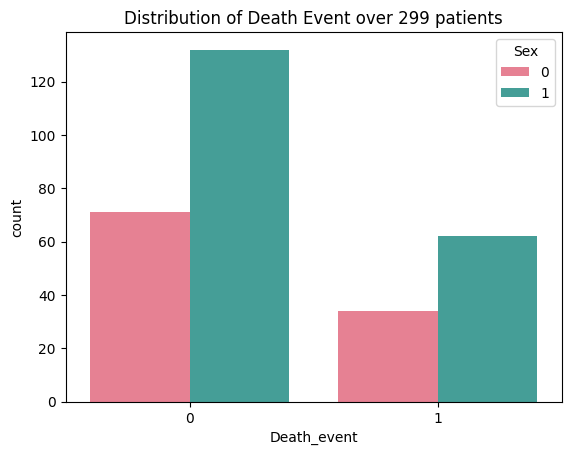

In [ ]:
sns.countplot(x="Death_event", data=data, hue='Sex', palette='husl')
plt.title('Distribution of Death Event over 299 patients')
plt.show()



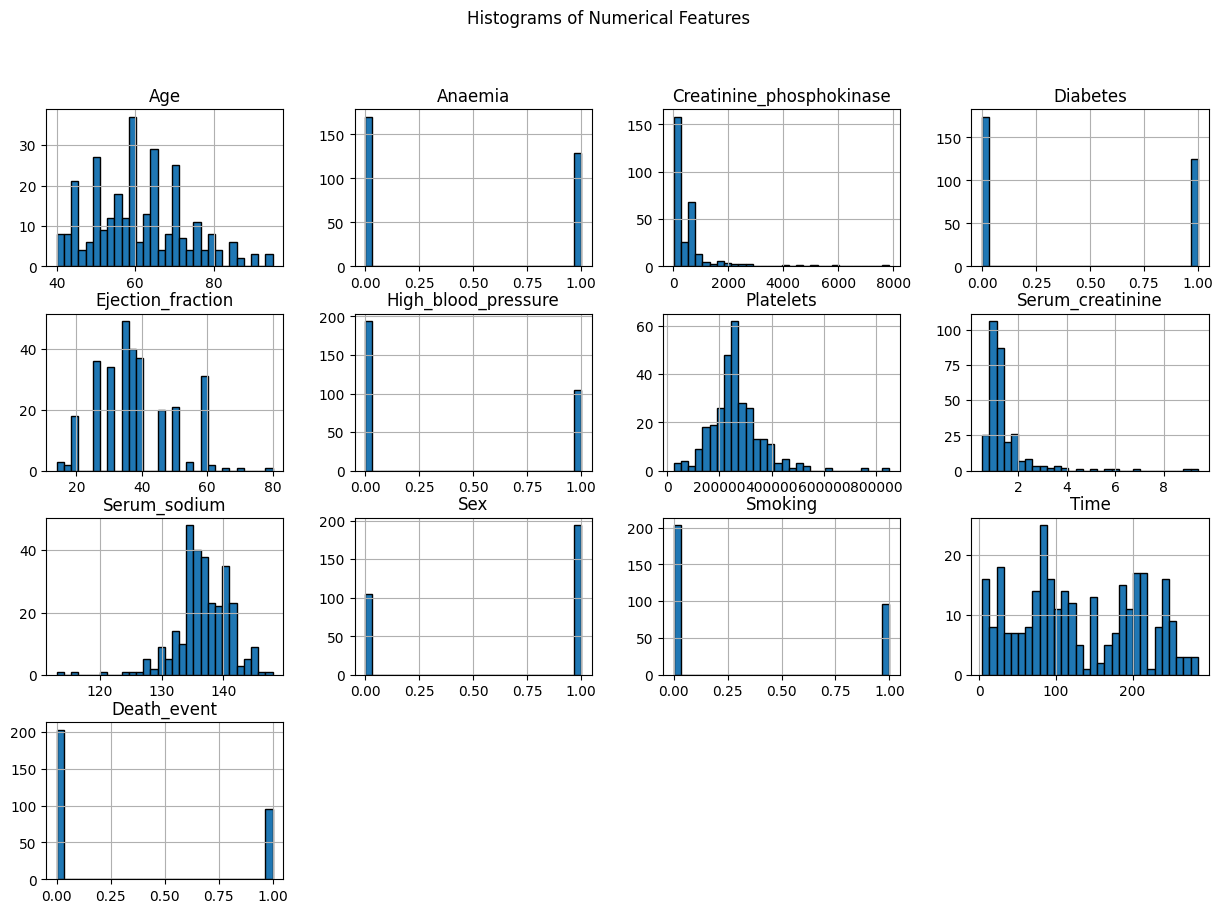

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for all numerical columns
data.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

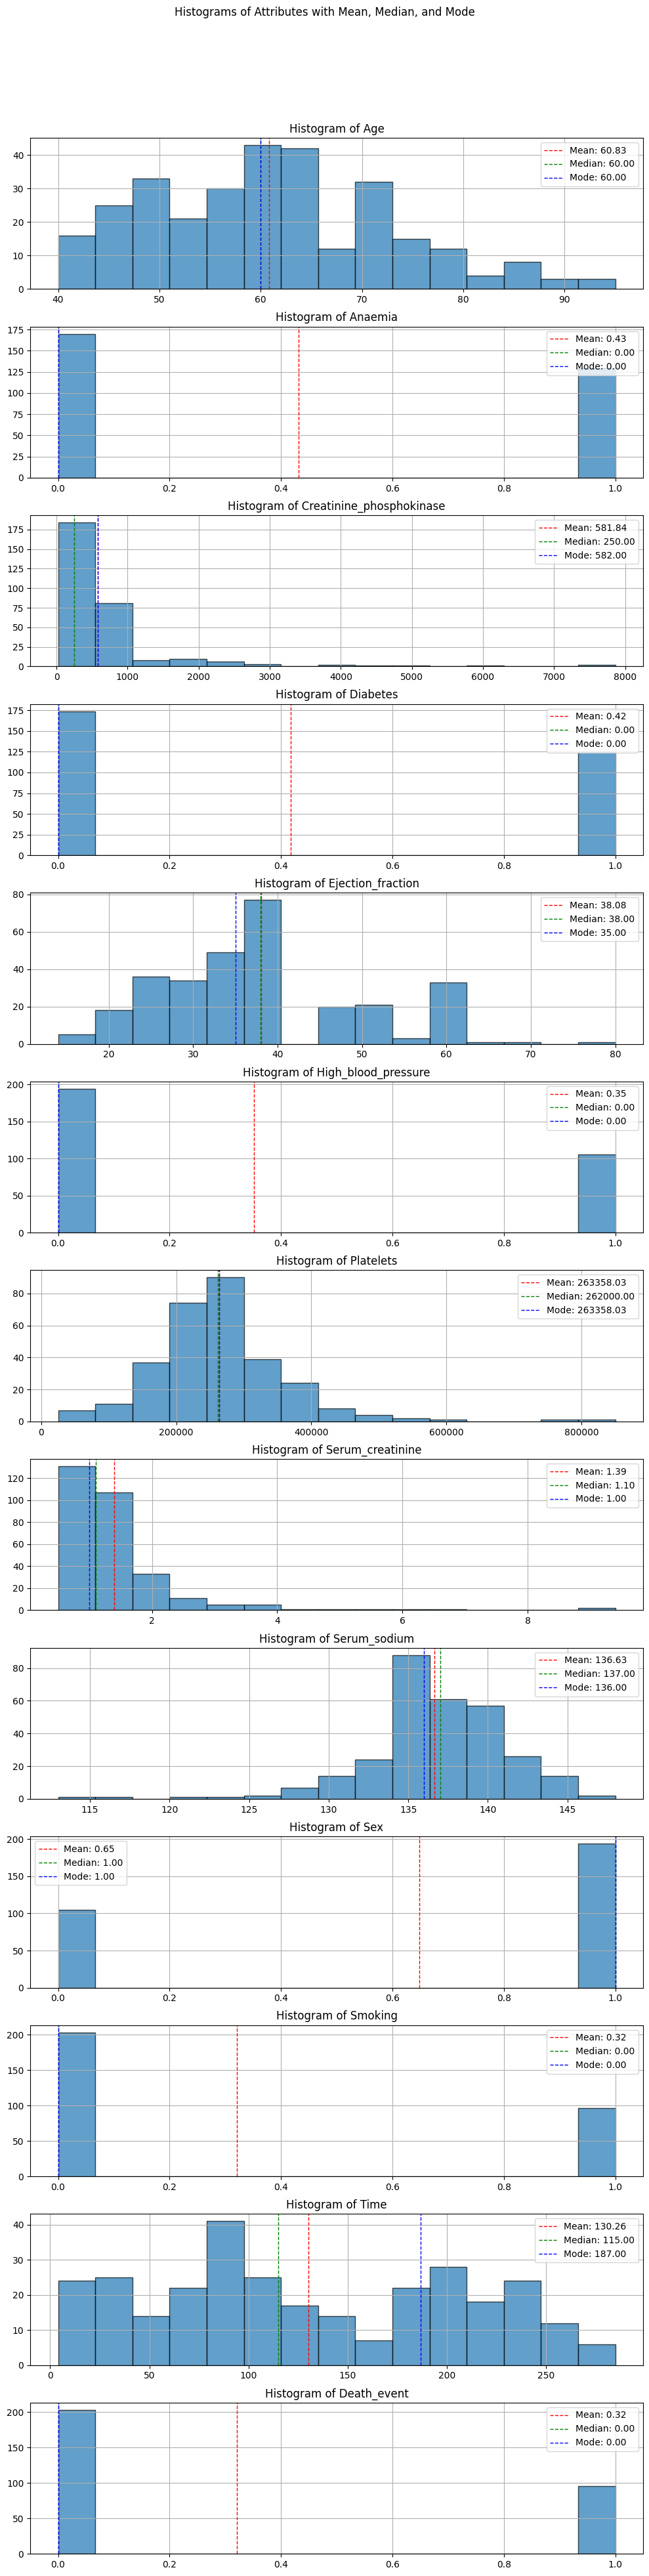

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Plot histograms for all numerical columns
fig, axes = plt.subplots(nrows=len(data.select_dtypes(include=[np.number]).columns), ncols=1, figsize=(10, 40), squeeze=False)
axes = axes.flatten()

for i, column in enumerate(data.select_dtypes(include=[np.number]).columns):
    ax = axes[i]
    data[column].hist(ax=ax, bins=15, edgecolor='black', alpha=0.7)

    # Calculate and plot mean, median, and mode
    mean = data[column].mean()
    median = data[column].median()
    mode = data[column].mode()[0]  # mode() returns a Series

    ax.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
    ax.axvline(median, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median:.2f}')
    ax.axvline(mode, color='blue', linestyle='dashed', linewidth=1, label=f'Mode: {mode:.2f}')

    ax.set_title(f'Histogram of {column}')
    ax.legend()

plt.tight_layout()
plt.suptitle('Histograms of Attributes with Mean, Median, and Mode')
plt.subplots_adjust(top=0.93)
plt.show()

## **2.1.5 Pivot the data**

In [ ]:
df = data

#Define age bins and labels
bins = [40, 50, 60, 70, 80, 90, 100]  #Bin edges (40-49, 50-59, 60-69, 70-79, 80-89, 90-99)
labels = ['40-49', '50-59', '60-69', '70-79', '80-89', '90-99']  #Labels for the bins

#Create a new column 'Age_group' with the age ranges
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

#Summing Death_event by Age_group
death_event_by_age_group = df.pivot_table(index='Age_group',
                                          values='Death_event',
                                          aggfunc='sum')

#Print the result
print("Death Event Count by Age Group:")
print(death_event_by_age_group)

#Drop the 'Age_group' column from the original DataFrame
df = df.drop(columns=['Age_group'])

#Verify that the column has been dropped
print("DataFrame after dropping 'Age_group':")
print(df.head())

Death Event Count by Age Group:
           Death_event
Age_group             
40-49               11
50-59               20
60-69               27
70-79               20
80-89               13
90-99                5
DataFrame after dropping 'Age_group':
    Age  Anaemia  Creatinine_phosphokinase  Diabetes  Ejection_fraction  High_blood_pressure  \
0  75.0        0                       582         0                 20                    1   
1  55.0        0                      7861         0                 38                    0   
2  65.0        0                       146         0                 20                    0   
3  50.0        1                       111         0                 20                    0   
4  65.0        1                       160         1                 20                    0   

   Platelets  Serum_creatinine  Serum_sodium  Sex  Smoking  Time  Death_event  
0  265000.00               1.9           130    1        0     4            1  
1  263358

Observation:
Based on the results above, the highest death recorded at the range age of 60-69 years odl with 27 death.

In [ ]:
print(df.columns)

Index(['Age', 'Anaemia', 'Creatinine_phosphokinase', 'Diabetes', 'Ejection_fraction',
       'High_blood_pressure', 'Platelets', 'Serum_creatinine', 'Serum_sodium', 'Sex', 'Smoking',
       'Time', 'Death_event'],
      dtype='object')


In [ ]:
#Mean of numerical features for DEATH_EVENT
mean_numerical_by_death = df.pivot_table(index='Death_event',
                                         values=['Age', 'Creatinine_phosphokinase', 'Ejection_fraction', 'Platelets', 'Serum_creatinine', 'Serum_sodium', 'Time'],
                                         aggfunc='mean')

# Display the results
print("Mean of Numerical Features by DEATH_EVENT:")
print(mean_numerical_by_death)

Mean of Numerical Features by DEATH_EVENT:
                   Age  Creatinine_phosphokinase  Ejection_fraction      Platelets  \
Death_event                                                                          
0            58.761906                540.054187           40.26601  266657.489901   
1            65.215281                670.197917           33.46875  256381.044792   

             Serum_creatinine  Serum_sodium        Time  
Death_event                                              
0                    1.184877    137.216749  158.339901  
1                    1.835833    135.375000   70.885417  


Pivot

Above is pivotted on binary data only where data is grouped via Age as index. Mean function is used for this function.

## **2.1.6 Watch out for outliers**

There are few ways of determining outliers statistically. Since data in this project contains mixture of normal distributed and skewed data, two statistical methods will be used which are the z-score and interquatile range (IQR). Normal distributed data will be using Z-score while skewed data will be using IQR.

Based on the data distribution above, Ejection_fraction, Plateles and Serum_sodium are normally distributed and will utilise z-score method while Age, Creatine_phosphokinese, Serum_creatine and Time are skewed data and will be using IQR method.

Interquatile Range (IQR)



In [ ]:
#Drop columns that are not involved in IQR outlier determination.
dropped_iqr = df.drop(['Ejection_fraction', 'Platelets','Serum_sodium', 'Anaemia', 'Diabetes', 'High_blood_pressure', 'Sex','Smoking', 'Death_event'], axis=1)

In [ ]:
# Determination of outliers using IQR method

# Dictionary to store number of outliers for each column
iqr_outlier_counts = {}

# Iterate over each column
for column in dropped_iqr:
    if pd.api.types.is_numeric_dtype(df[column]):
        # Calculate Q1 and Q3
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Calculate IQR
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        iqr_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # Count outliers
        num_outliers = iqr_outliers.shape[0]

        # Store the count in the dictionary
        iqr_outlier_counts[column] = num_outliers

# Print out the number of outliers for each column
for column, count in iqr_outlier_counts.items():
    print(f"Number of outliers in column '{column}': {count}")

Number of outliers in column 'Age': 0
Number of outliers in column 'Creatinine_phosphokinase': 29
Number of outliers in column 'Serum_creatinine': 29
Number of outliers in column 'Time': 0


Z-Score

In [ ]:
# Drop columns that are not involved in Z-score outlier determination.
dropped_z = df.drop(['Age', 'Creatinine_phosphokinase','Serum_creatinine', 'Time', 'Anaemia', 'Diabetes', 'High_blood_pressure', 'Sex','Smoking', 'Death_event'], axis=1)

In [ ]:
# Define Z-score threshold
z_threshold = 3

# Dictionary to store the number of outliers for each column
z_outlier_counts = {}

# Calculate Z-scores and identify outliers
for column in dropped_z:
    if pd.api.types.is_numeric_dtype(df[column]):
        # Calculate Z-scores for the column
        z_scores = stats.zscore(df[column])

        # Identify outliers
        z_outliers = abs(z_scores) > z_threshold

        # Count outliers
        num_outliers = sum(z_outliers)

        # Store the count in the dictionary
        z_outlier_counts[column] = num_outliers

# Print the number of outliers for each column
#for column in dropped_df:
    #print(z_outliers)
#print(z_outliers)
for column, count in z_outlier_counts.items():
    print(f"Number of outliers in column '{column}': {count}")

Number of outliers in column 'Ejection_fraction': 1
Number of outliers in column 'Platelets': 3
Number of outliers in column 'Serum_sodium': 3


Remove Outlier

In [ ]:
# Initialize set to collect outlier indices
outlier_indices = set()

# Identify and collect outlier indices based on Z-score
for column in dropped_z:
    if pd.api.types.is_numeric_dtype(df[column]):
        # Calculate Z-scores
        z_scores = stats.zscore(df[column])
        # Find outlier indices
        outlier_indices_z = df.index[abs(z_scores) > z_threshold]
        # Add outlier indices to the set
        outlier_indices.update(outlier_indices_z)

# Identify and collect outlier indices based on IQR
for column in dropped_iqr:
    if pd.api.types.is_numeric_dtype(df[column]):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outlier indices
        outlier_indices_iqr = df.index[(df[column] < lower_bound) | (df[column] > upper_bound)]
        # Add outlier indices to the set
        outlier_indices.update(outlier_indices_iqr)

# Drop rows with combined outliers
df_cleaned = df.drop(index=outlier_indices)

print("Total outliers based on Z-score and IQR:", 61)
print("DataFrame after dropping rows with outliers based on Z-score and IQR:")
print(df_cleaned)

Total outliers based on Z-score and IQR: 61
DataFrame after dropping rows with outliers based on Z-score and IQR:
      Age  Anaemia  Creatinine_phosphokinase  Diabetes  Ejection_fraction  High_blood_pressure  \
0    75.0        0                       582         0                 20                    1   
2    65.0        0                       146         0                 20                    0   
3    50.0        1                       111         0                 20                    0   
5    90.0        1                        47         0                 40                    1   
6    75.0        1                       246         0                 15                    0   
..    ...      ...                       ...       ...                ...                  ...   
291  60.0        0                       320         0                 35                    0   
292  52.0        0                       190         1                 38                    0   
293 

In [ ]:
print("Total rows before drop:",len(data))
print("Total rows after drop:",len(df_cleaned))
print("Total outlier rows removed:", len(outlier_indices))

Total rows before drop: 299
Total rows after drop: 238
Total outlier rows removed: 61


In [ ]:
#Noticed that in age & platelets column there are decimal points which are not standardized. Thus, round up the whole column as below:

# Round up the 'age' and 'platelets' columns
df_cleaned['Age'] = df_cleaned['Age'].round()
df_cleaned['Platelets'] = df_cleaned['Platelets'].round()

# To check the updated data after round up. Specifically checking at column ~180 to double check for age. Before were 60.667.
print(df_cleaned[['Age', 'Platelets']].head(130))


# Saving cleaned dataset to CSV file
df_cleaned.to_csv('cleaned_data.csv', index=True)

print("DataFrame saved to 'cleaned_data.csv'")



      Age  Platelets
0    75.0   265000.0
2    65.0   162000.0
3    50.0   210000.0
5    90.0   204000.0
6    75.0   127000.0
..    ...        ...
162  63.0   448000.0
165  80.0   192000.0
166  53.0   220000.0
168  65.0   270000.0
169  70.0   305000.0

[130 rows x 2 columns]
DataFrame saved to 'cleaned_data.csv'


## **2.1.7 Understand the relationship between attributes**

In [ ]:
#Data type
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       238 non-null    float64
 1   Anaemia                   238 non-null    int64  
 2   Creatinine_phosphokinase  238 non-null    int64  
 3   Diabetes                  238 non-null    int64  
 4   Ejection_fraction         238 non-null    int64  
 5   High_blood_pressure       238 non-null    int64  
 6   Platelets                 238 non-null    float64
 7   Serum_creatinine          238 non-null    float64
 8   Serum_sodium              238 non-null    int64  
 9   Sex                       238 non-null    int64  
 10  Smoking                   238 non-null    int64  
 11  Time                      238 non-null    int64  
 12  Death_event               238 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 26.0 KB


In [ ]:
# Correlation: How two variables interact and influence each other
correlations = df_cleaned.corr(method='pearson')
print(correlations)

                               Age   Anaemia  Creatinine_phosphokinase  Diabetes  \
Age                       1.000000  0.072194                  0.026340 -0.062584   
Anaemia                   0.072194  1.000000                 -0.187563 -0.053995   
Creatinine_phosphokinase  0.026340 -0.187563                  1.000000  0.001215   
Diabetes                 -0.062584 -0.053995                  0.001215  1.000000   
Ejection_fraction         0.084764  0.010193                 -0.107789  0.016763   
High_blood_pressure       0.095476  0.012185                 -0.020287  0.068793   
Platelets                -0.063042 -0.024596                  0.019894  0.062153   
Serum_creatinine          0.280632 -0.018044                  0.076740 -0.006741   
Serum_sodium             -0.008691  0.076799                 -0.097680 -0.131107   
Sex                       0.064107 -0.071657                 -0.035078 -0.145380   
Smoking                  -0.003381 -0.123124                 -0.044844 -0.12

## **2.1.8 Visualize the relationship between attributes**

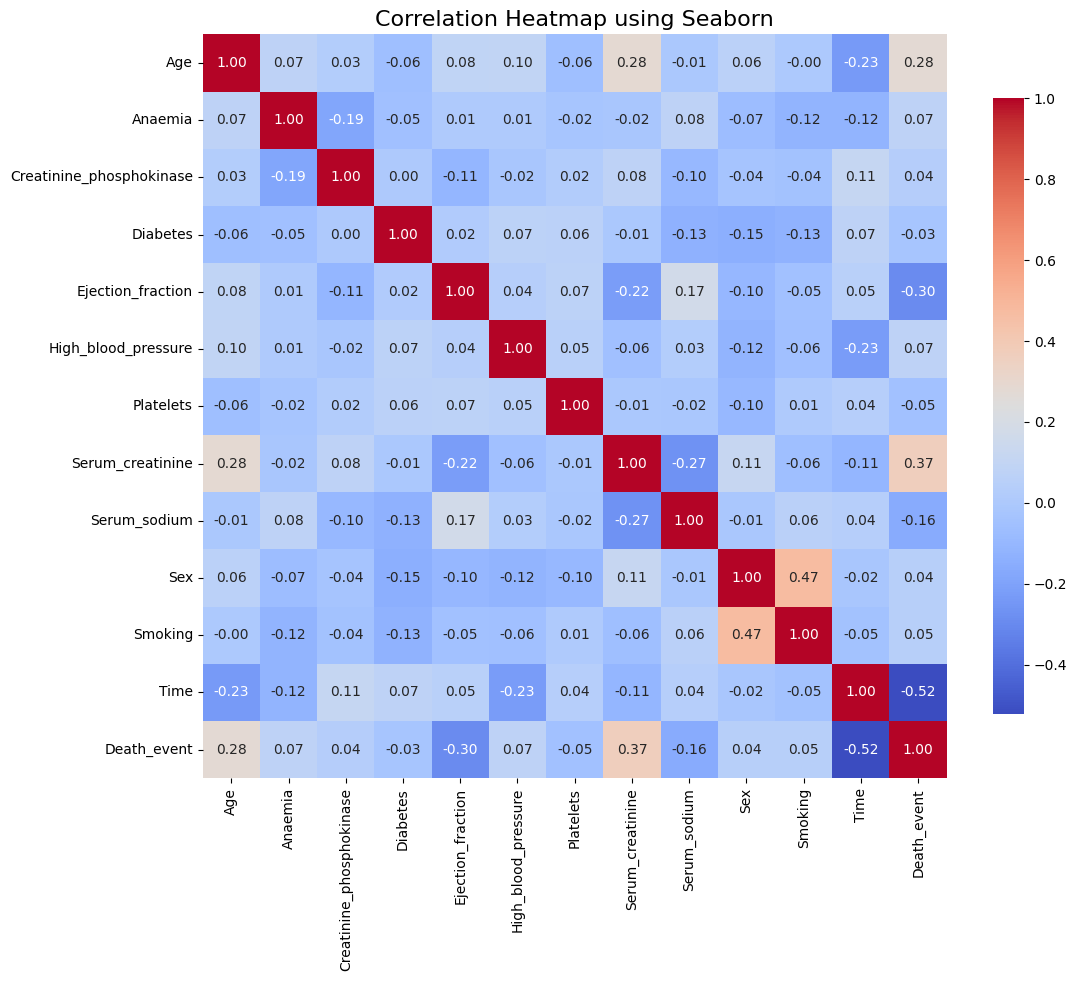

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Set the figure size
plt.figure(figsize=(12, 10))

#Create a heatmap to visualize the correlation matrix
sns.heatmap(correlations, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add a title to the heatmap
plt.title('Correlation Heatmap using Seaborn', fontsize=16)

# Display the heatmap
plt.show()

Age has a positive correlation with Death_event (0.253729), indicating that
older age might be linked to higher death events.
time has a negative correlation with Death_event (-0.526964), suggesting that as the time since diagnosis or treatment increases, the likelihood of death events decreases.
Serum_creatinine has a moderate positive correlation with Death_event (0.294278), implying it could be an important feature.

Smoking & sex feature has a high correlation (0.445892).
Diabeties & Creatinine_phosphokinase has no correlation (0.0)

# **2-2 Design Framework**

## **2.2.1 Introduction on Machine Learning**



The objective of this machine learning task is to predict heart failure based on various health-related features. The dataset used for this task contains 238  samples and 12 features (exclude Target):

  * Features: Age, Anaemia, Creatinine Phosphokinase, Diabetes, Ejection Fraction, High Blood Pressure, Platelets, Serum Creatinine, Serum Sodium, Sex, Smoking, Time.

  * Target: Death Event (binary classification – 0 for no death event, 1 for death event).

The task involves building classification models to predict whether a patient will experience a death event based on their health metrics. We aim to implement three different machine learning algorithms, assess their performance, and choose the most accurate model for this prediction.

## **2.2.2 Design of the Machine Learning Models**



**Preprocessing:**

* Feature Scaling: Since some of the features, such as creatinine phosphokinase, ejection fraction, and others, vary significantly in scale, MinMaxScaler is applied to scale all features between 0 and 1 to ensure uniformity across all models.
* Feature Selection: Dataset has only 12 features and 299 samples (raw) & 238 clean data. Feature selection may not significantly improve the model’s performance, as the small dataset might not benefit much from reducing features.

**Classification Algorithms:**

Three machine learning algorithms will be used for classification:

1. Logistic Regression: A linear model that estimates probabilities based on a logistic function. This is a baseline model for binary classification tasks.

2. k-Nearest Neighbors (k-NN): A non-parametric, instance-based learning model where the class label of a new instance is determined by the majority class among its nearest neighbors.

3. Random Forest: A decision tree-based ensemble learning method that builds multiple decision trees during training and outputs the mode of the classes for classification.

**Dataset Partitioning:**

The dataset is split into two sets:
* Training Set (80%): Used to train the model.
* Testing Set (20%): Used to evaluate the model's performance.

The splitting is done using the train_test_split function, ensuring stratification to maintain the class distribution between the training and testing sets.

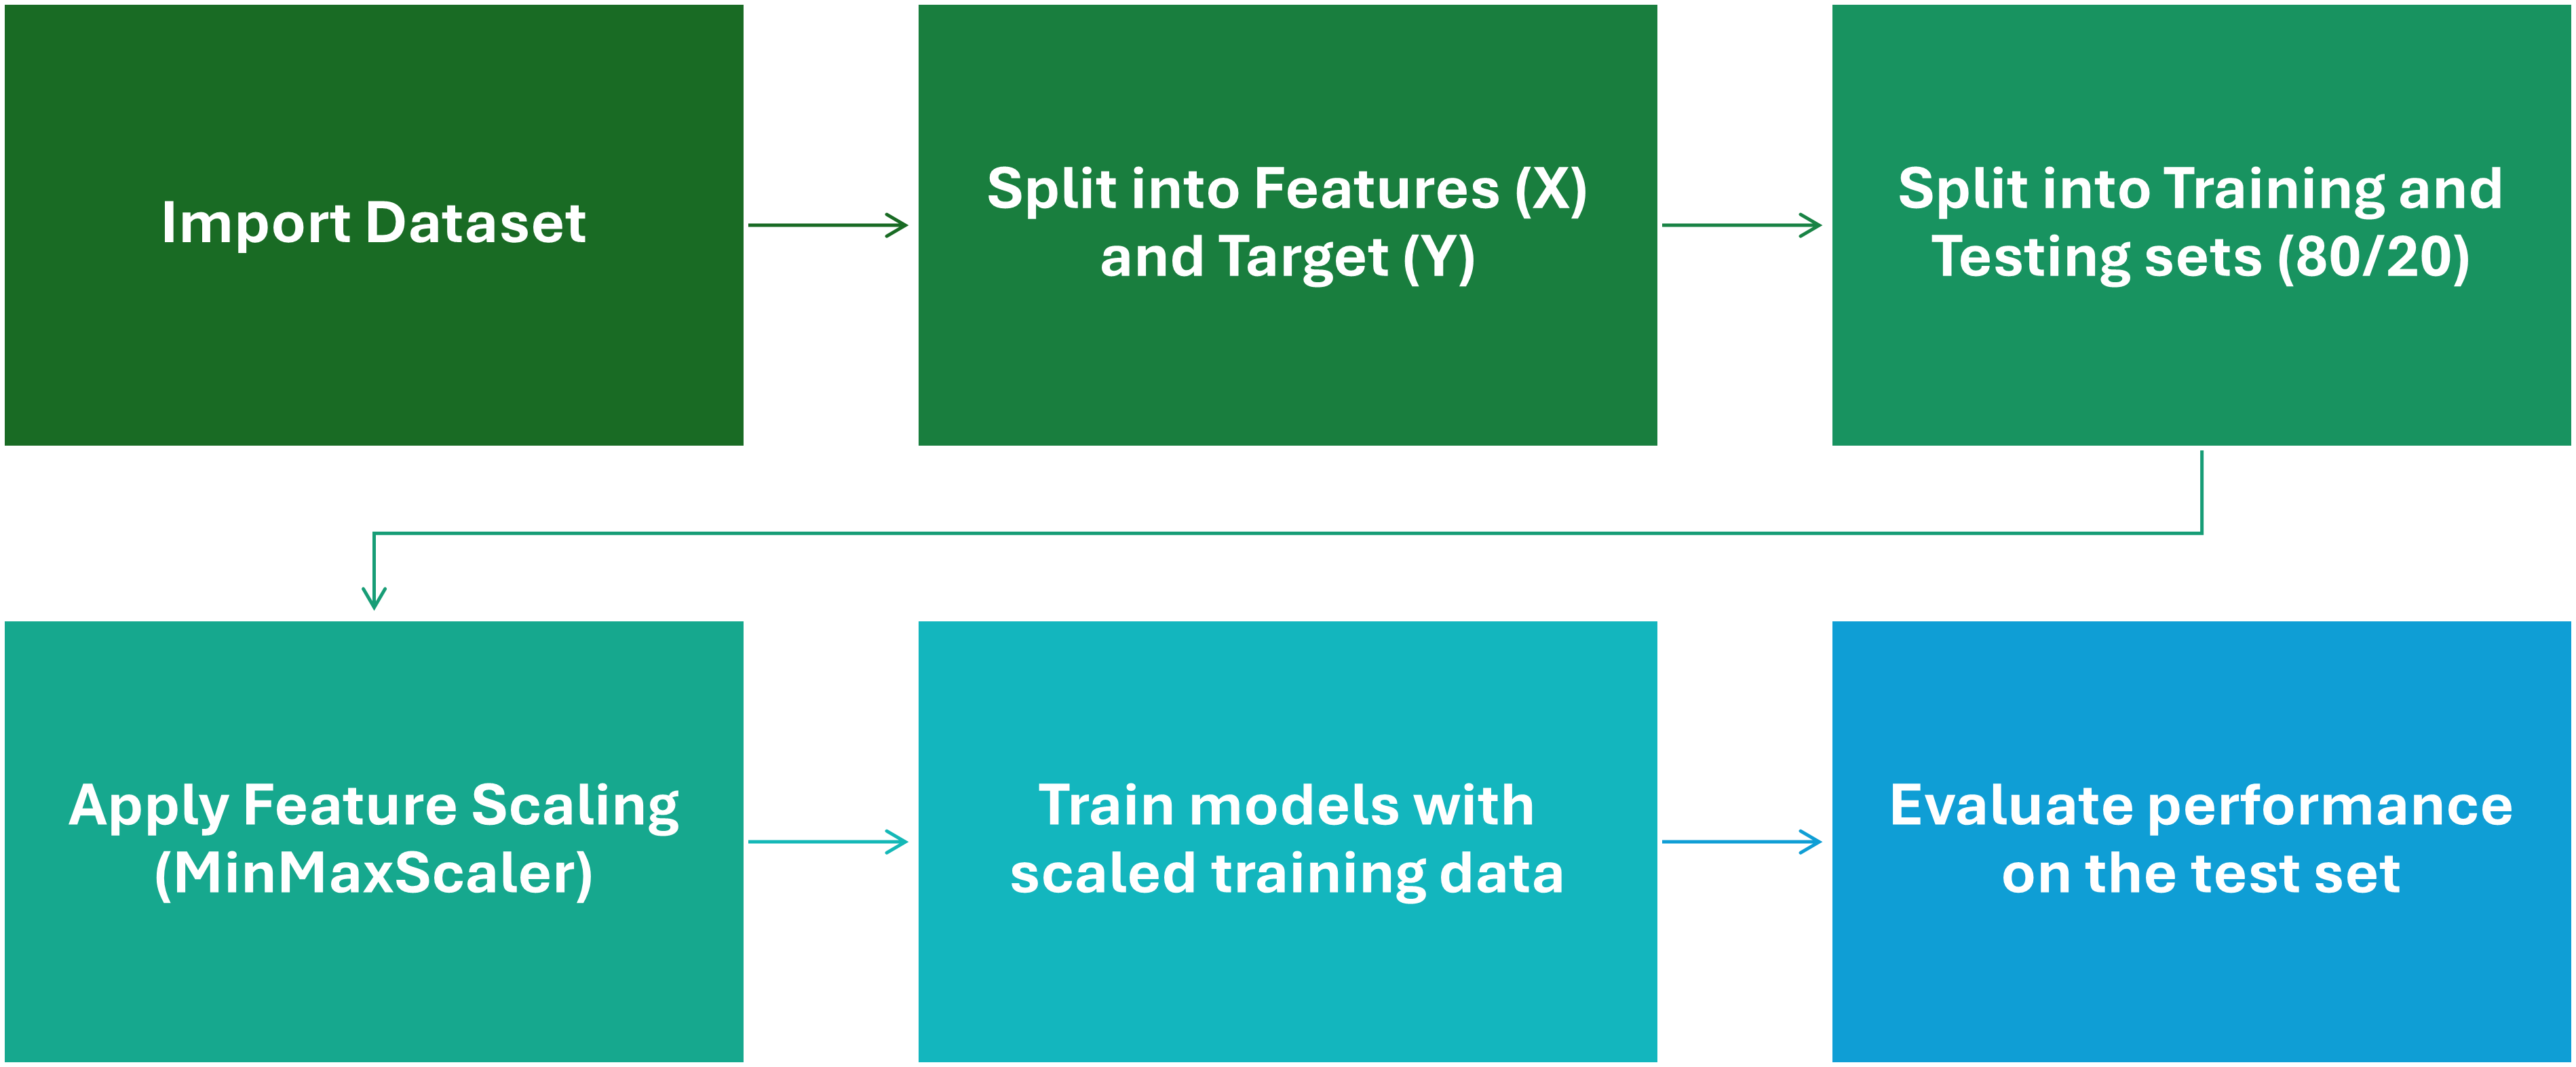



---



#2.2.3 Model Training & Evaluation



# Logistic regression

In [ ]:
import pandas as pd  # For data manipulation
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import MinMaxScaler  # For scaling features to a range
from sklearn.linear_model import LogisticRegression  # Importing Logistic Regression model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # For evaluating model performance

# Splitting Feature & Target
X = df_cleaned.drop(columns="Death_event", axis=1)  # Drop the target column 'Death_event' to create feature set X
Y = df_cleaned["Death_event"]  # Select the target column 'Death_event' as Y

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
# Split the data into training (80%) and testing (20%) sets. 'stratify=Y' ensures that the proportion of target classes is the same in both sets.
# 'random_state=2' ensures reproducibility of the split.

# Scaling Features using MinMaxScaler
scaler = MinMaxScaler()  # Initialize the MinMaxScaler object
X_train_scaled = scaler.fit_transform(X_train)  # Fit the scaler on the training data and transform it
X_test_scaled = scaler.transform(X_test)  # Transform the test data using the same scaler

# Print the shape of the training and testing sets
print('Training set shape: ', X_train.shape, Y_train.shape)  # To display the dimensions of the training feature set and target
print('Testing set shape: ', X_test.shape, Y_test.shape)  # To display the dimensions of the testing feature set and target


Training set shape:  (190, 12) (190,)
Testing set shape:  (48, 12) (48,)


- The training set is used to teach the model, and it has 190 samples with 12 features each.
- The testing set is used to evaluate the model, and it has 48 samples with the same 12 features.

In [ ]:
# Training the Logistic Regression model with training data (X_train, Y_train)
model_lr = LogisticRegression(solver = 'liblinear')
model_lr.fit(X_train_scaled, Y_train)

# Model Evaluation
# Accuracy on training data
X_train_prediction_lr = model_lr.predict(X_train_scaled)
training_data_accuracy_lr = accuracy_score(Y_train, X_train_prediction_lr)

print('Accuracy on training data: ', training_data_accuracy_lr)

# Accuracy on test data
X_test_prediction_lr = model_lr.predict(X_test_scaled)
test_data_accuracy_lr = accuracy_score(Y_test, X_test_prediction_lr)

print('Accuracy on test data: ', test_data_accuracy_lr)

Accuracy on training data:  0.8368421052631579
Accuracy on test data:  0.8541666666666666


The model achieved an accuracy of approximately 83.7% on the training data and about 85.4% on the test data. This indicates that the model not only performs well on the data it was trained on but also generalizes effectively to new, unseen data.

In [ ]:
# Confusion Matrix and Classification Report for Training Set
print("\nTraining Set Evaluation")
print("Confusion Matrix:\n", confusion_matrix(Y_train, X_train_prediction_lr))
print("Classification Report:\n", classification_report(Y_train, X_train_prediction_lr))


Training Set Evaluation
Confusion Matrix:
 [[129   7]
 [ 24  30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89       136
           1       0.81      0.56      0.66        54

    accuracy                           0.84       190
   macro avg       0.83      0.75      0.78       190
weighted avg       0.83      0.84      0.83       190



In [ ]:
# Confusion Matrix and Classification Report for Test Set
print("\nTest Set Evaluation")
print("Confusion Matrix:\n", confusion_matrix(Y_test, X_test_prediction_lr))
print("Classification Report:\n", classification_report(Y_test, X_test_prediction_lr))


Test Set Evaluation
Confusion Matrix:
 [[31  3]
 [ 4 10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90        34
           1       0.77      0.71      0.74        14

    accuracy                           0.85        48
   macro avg       0.83      0.81      0.82        48
weighted avg       0.85      0.85      0.85        48



Above results show confusion matrix and classification reports on both training set and test test evaluations. It shows strong performance in predicting Class 0 but less effective for Class 1.

**Training set confusion matrix:**
* True Positives (TP): 129 (Class 1)
* True Negatives (TN): 30 (Class 0)
* False Positives (FP): 24 (Class 0 predicted as Class 1)
* False Negatives (FN): 7 (Class 1 predicted as Class 0)

**Test set confusion matrix**
* True Positives (TP): 31 (Class 1)
* True Negatives (TN): 10 (Class 0)
* False Positives (FP): 4 (Class 0 predicted as Class 1)
* False Negatives (FN): 3 (Class 1 predicted as Class 0)

# KNN

In [ ]:
import pandas as pd  # Import pandas for data manipulation and analysis
from sklearn.model_selection import train_test_split  # Import train_test_split for splitting the dataset into training and testing sets
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler for scaling features to a range
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier for implementing the k-Nearest Neighbors algorithm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Import metrics for evaluating model performance


In [ ]:
# Model Training - k-Nearest Neighbors (k-NN)
model_knn = KNeighborsClassifier(n_neighbors=5)

# Train k-NN model with Training Data
model_knn.fit(X_train_scaled, Y_train)

# Model Evaluation
# Accuracy on training data
X_train_prediction_knn = model_knn.predict(X_train_scaled)
training_data_accuracy_knn = accuracy_score(Y_train, X_train_prediction_knn)

print('Accuracy on training data: ', training_data_accuracy_knn)

# Accuracy on test data
X_test_prediction_knn = model_knn.predict(X_test_scaled)
test_data_accuracy_knn = accuracy_score(Y_test, X_test_prediction_knn)

print('Accuracy on test data: ', test_data_accuracy_knn)

Accuracy on training data:  0.7894736842105263
Accuracy on test data:  0.8125


The results show that the model performs well on both datasets, with a slightly higher accuracy on the test data (81.3% accuracy on the test data compared to 78.9% accuracy on the training data), suggesting good generalization and good performance on newly unseen data.

In [ ]:
# Confusion Matrix and Classification Report for Training Set
print("\nTraining Set Evaluation")
print("Confusion Matrix:\n", confusion_matrix(Y_train, X_train_prediction_knn))
print("Classification Report:\n", classification_report(Y_train, X_train_prediction_knn))


Training Set Evaluation
Confusion Matrix:
 [[128   8]
 [ 32  22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86       136
           1       0.73      0.41      0.52        54

    accuracy                           0.79       190
   macro avg       0.77      0.67      0.69       190
weighted avg       0.78      0.79      0.77       190



In [ ]:
# Confusion Matrix and Classification Report for Test Set
print("\nTest Set Evaluation")
print("Confusion Matrix:\n", confusion_matrix(Y_test, X_test_prediction_knn))
print("Classification Report:\n", classification_report(Y_test, X_test_prediction_knn))


Test Set Evaluation
Confusion Matrix:
 [[32  2]
 [ 7  7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.88        34
           1       0.78      0.50      0.61        14

    accuracy                           0.81        48
   macro avg       0.80      0.72      0.74        48
weighted avg       0.81      0.81      0.80        48



Above results show confusion matrix and classification reports on both training set and test set evaluations based on the KNN evaluation method.

**Training set confusion matrix:**
* True Positives (TP): 128 (Class 1)
* True Negatives (TN): 22 (Class 0)
* False Positives (FP): 8 (Class 0 predicted as Class 1)
* False Negatives (FN): 32 (Class 1 predicted as Class 0)

**Test set confusion matrix**
* True Positives (TP): 32 (Class 1)
* True Negatives (TN): 7 (Class 0)
* False Positives (FP): 2 (Class 0 predicted as Class 1)
* False Negatives (FN): 7 (Class 1 predicted as Class 0)

# Naive Bayes

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model Training - Naive Bayes
model_nb = GaussianNB()

# Train Naive Bayes model with Training Data
model_nb.fit(X_train_scaled, Y_train)

# Model Evaluation
# Accuracy on training data
X_train_prediction_nb = model_nb.predict(X_train_scaled)
training_data_accuracy_nb = accuracy_score(Y_train, X_train_prediction_nb)

print('Accuracy on training data: ', training_data_accuracy_nb)

# Accuracy on test data
X_test_prediction_nb = model_nb.predict(X_test_scaled)
test_data_accuracy_nb = accuracy_score(Y_test, X_test_prediction_nb)

print('Accuracy on test data: ', test_data_accuracy_nb)

Accuracy on training data:  0.8736842105263158
Accuracy on test data:  0.7916666666666666


In [ ]:
# Confusion Matrix and Classification Report for Training Set
print("\nTraining Set Evaluation")
print("Confusion Matrix:\n", confusion_matrix(Y_train, X_train_prediction_nb))
print("Classification Report:\n", classification_report(Y_train, X_train_prediction_nb))


Training Set Evaluation
Confusion Matrix:
 [[128   8]
 [ 16  38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       136
           1       0.83      0.70      0.76        54

    accuracy                           0.87       190
   macro avg       0.86      0.82      0.84       190
weighted avg       0.87      0.87      0.87       190



In [ ]:
# Confusion Matrix and Classification Report for Test Set
print("\nTest Set Evaluation")
print("Confusion Matrix:\n", confusion_matrix(Y_test, X_test_prediction_nb))
print("Classification Report:\n", classification_report(Y_test, X_test_prediction_nb))


Test Set Evaluation
Confusion Matrix:
 [[29  5]
 [ 5  9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        34
           1       0.64      0.64      0.64        14

    accuracy                           0.79        48
   macro avg       0.75      0.75      0.75        48
weighted avg       0.79      0.79      0.79        48



Above results show confusion matrix and classification reports on both training set and test test evaluations based on the NB evaluation method.

**Training set confusion matrix:**
* True Positives (TP): 128 (Class 1)
* True Negatives (TN): 38 (Class 0)
* False Positives (FP): 8 (Class 0 predicted as Class 1)
* False Negatives (FN): 16 (Class 1 predicted as Class 0)

**Test set confusion matrix**
* True Positives (TP): 29 (Class 1)
* True Negatives (TN): 9 (Class 0)
* False Positives (FP): 5 (Class 0 predicted as Class 1)
* False Negatives (FN): 5 (Class 1 predicted as Class 0)

# 2.2.4 Comparison Between Models

In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()}

# Train and evaluate models on test data
accuracies = {}
for name, model in models.items():
    model.fit(X_train_scaled, Y_train)
    Y_test_prediction = model.predict(X_test_scaled)
    accuracy = accuracy_score(Y_test, Y_test_prediction)
    accuracies[name] = accuracy
    print(f"{name} Accuracy on Test Data: {accuracy}")

Logistic Regression Accuracy on Test Data: 0.8333333333333334
k-Nearest Neighbors Accuracy on Test Data: 0.8125
Naive Bayes Accuracy on Test Data: 0.7916666666666666


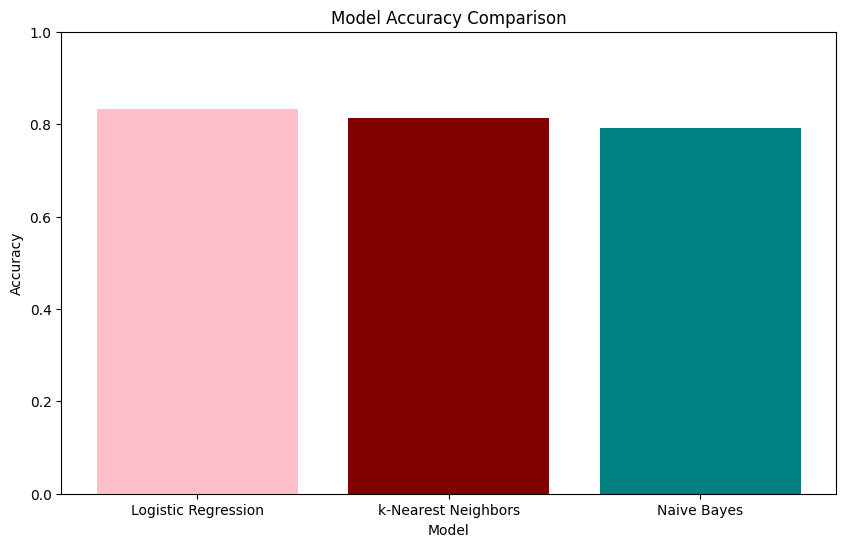

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['pink', 'maroon', 'teal'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

Logistic Regression appears to be the best model based on the test set evaluation metrics. It outperforms the other models with the highest accuracy, best F1-score, and a strong balance between precision and recall for both classes.

* Accuracy: Highest for Logistic Regression (0.83), indicating the most accurate predictions.
* Precision and Recall: Provides the best balance for predicting both classes, showing reliable performance.
* F1-Score: Highest for Logistic Regression, reflecting strong performance in both precision and recall.

# Building Predective System

By using best performance model - Logistic Regression
- For row 1 from cleaned_data file

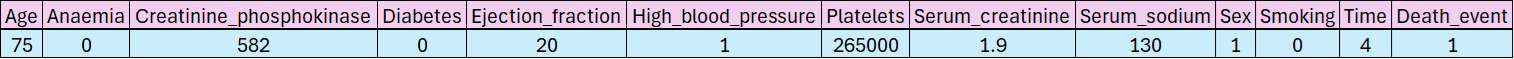

In [ ]:
input_data = (75.0, 0, 582, 0, 20, 1, 265000.0, 1.9, 130, 1, 0, 4)
input_data_as_df = pd.DataFrame([input_data], columns=X.columns)

# Scaling input data
input_data_scaled = scaler.transform(input_data_as_df)

# Prediction
prediction = model.predict(input_data_scaled)
print(prediction)

if prediction[0] == 0:
    print('The Patient Survived')
else:
    print('The Patient Did Not Survive')

[1]
The Patient Did Not Survive


- For row 100 from cleaned_data file

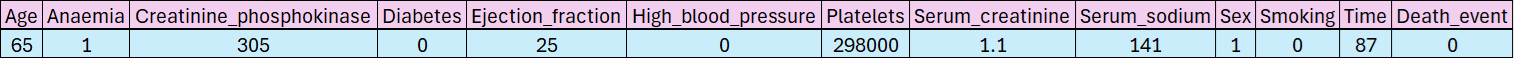

In [ ]:
input_data = (65.0,1,305,0,25,0,298000.0,1.1,141,1,0,87)
input_data_as_df = pd.DataFrame([input_data], columns=X.columns)

# Scaling input data
input_data_scaled = scaler.transform(input_data_as_df)

# Prediction
prediction = model.predict(input_data_scaled)
print(prediction)

if prediction[0] == 0:
    print('The Patient Survived')
else:
    print('The Patient Did Not Survive')

[0]
The Patient Survived


**Hyperparameter Tuning**

Hyperparameter tuning was done on the least accurate models (the Naive Bayes) to help improving its accuracy.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Initialize Gaussian Naive Bayes
nb_model = GaussianNB()

# Define the hyperparameter grid for Naive Bayes (limited options)
nb_params = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]  # Smoothing parameter
}

# Grid Search for Naive Bayes
nb_grid = GridSearchCV(nb_model, nb_params, cv=5, scoring='accuracy')
nb_grid.fit(X_train_scaled, Y_train)

# Get the best parameters and score
print("Best Naive Bayes Params:", nb_grid.best_params_)
print("Best Naive Bayes Score:", nb_grid.best_score_)

# Model Evaluation
X_test_prediction_nb = nb_grid.predict(X_test_scaled)
test_data_accuracy_nb = accuracy_score(Y_test, X_test_prediction_nb)
print('Naive Bayes Accuracy on test data: ', test_data_accuracy_nb)


Best Naive Bayes Params: {'var_smoothing': 1e-09}
Best Naive Bayes Score: 0.8263157894736842
Naive Bayes Accuracy on test data:  0.7916666666666666


GridSearchCV suggested that the best var_smooting for NB model of this dataset is 1e-09, the same var_smoothing used in auto-set parameter earlier, and both achieve the same accuracy of 79.1%.

To conclude, Logistic Regression is the best model for our dataset with the ability to predict new, unseen data with 83.3% accuracy. However since the dataset has 67% more Class 0 (survived patients) over Class 1 (death patients), the model seems to be lacking in predicting Class 1 accurately, with all three models have precision, recall and f1-scores below 70%. Additional steps such as over-sampling and under-sampling could be done in the future to improve the performance of the imbalance data.